In [14]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ishans24/brain-tumor-dataset")

# print("Path to dataset files:", path)

In [15]:
# !pip install kagglehub

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [10]:
import os

dataset_path = r"C:\Users\Piyush\Downloads\brain_tumor_dataset"

print("Classes:", os.listdir(dataset_path))

print("No tumor images count:",
      len(os.listdir(os.path.join(dataset_path, "no"))))

print("Yes tumor images count:",
      len(os.listdir(os.path.join(dataset_path, "yes"))))


Classes: ['no', 'yes']
No tumor images count: 98
Yes tumor images count: 155


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    r"C:\Users\Piyush\Downloads\brain_tumor_dataset",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    r"C:\Users\Piyush\Downloads\brain_tumor_dataset",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


C:\Users\Piyush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.6776 - loss: 1.0751

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"]))


              precision    recall  f1-score   support

    No Tumor       0.46      0.32      0.38        19
       Tumor       0.65      0.77      0.71        31

    accuracy                           0.60        50
   macro avg       0.56      0.54      0.54        50
weighted avg       0.58      0.60      0.58        50



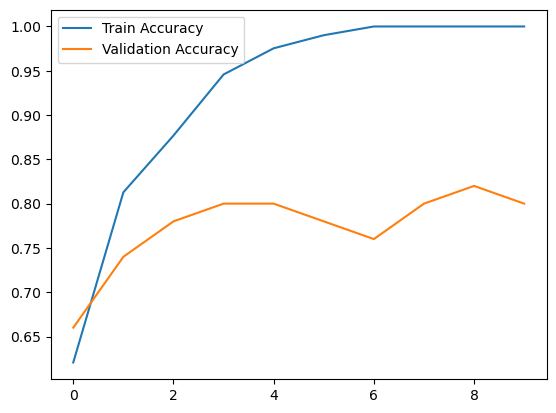

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


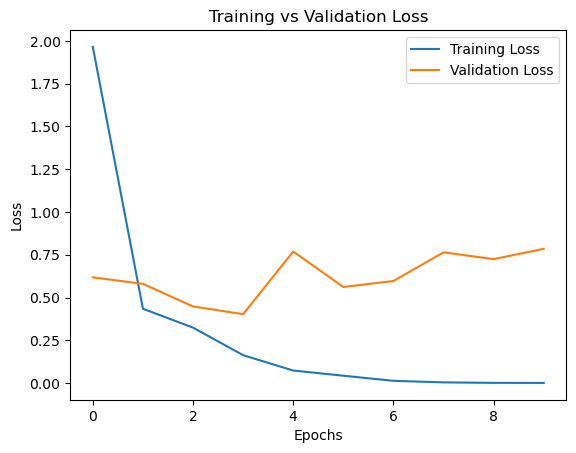

In [8]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


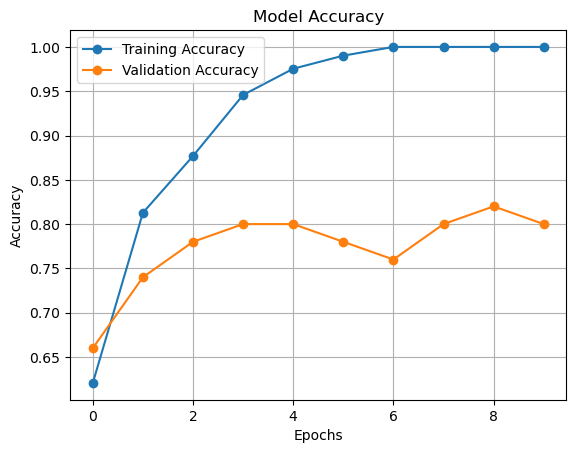

In [9]:
plt.figure()
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 


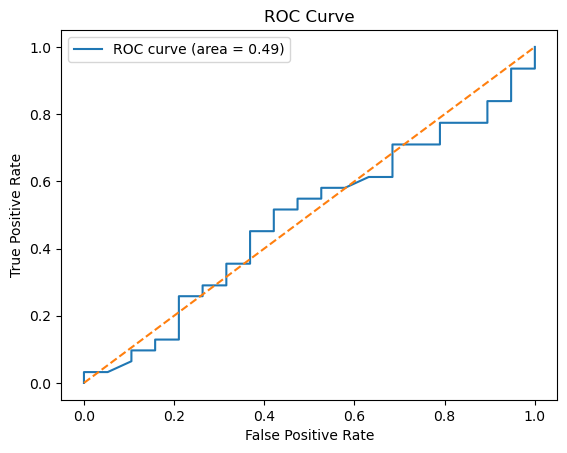

In [13]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict(val_data).ravel()

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


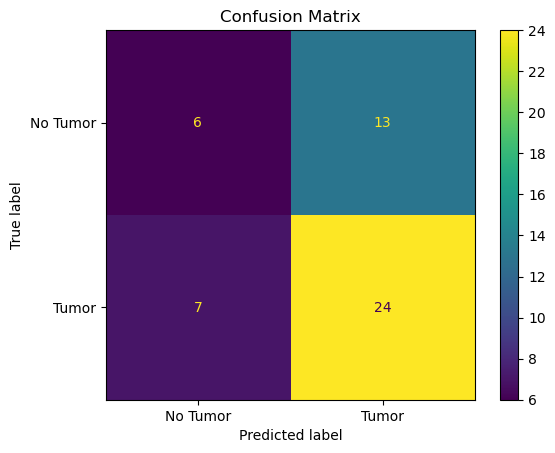

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true = val_data.classes
y_pred = (model.predict(val_data) > 0.5).astype("int32").flatten()

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No Tumor", "Tumor"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


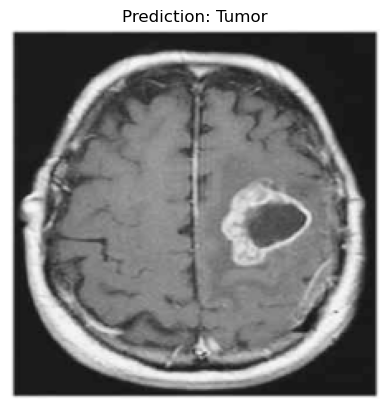

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


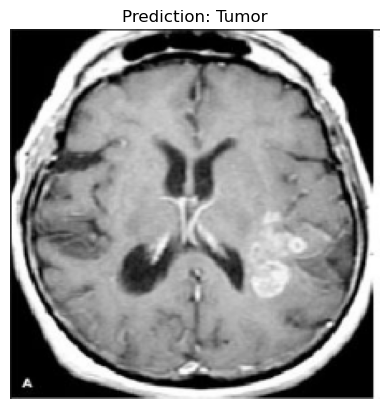

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


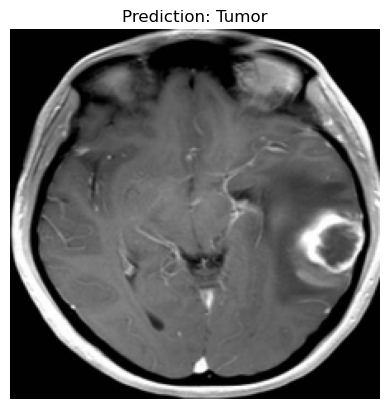

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


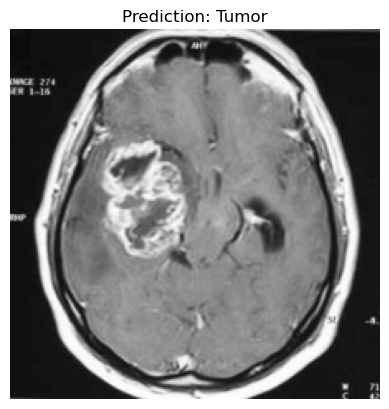

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


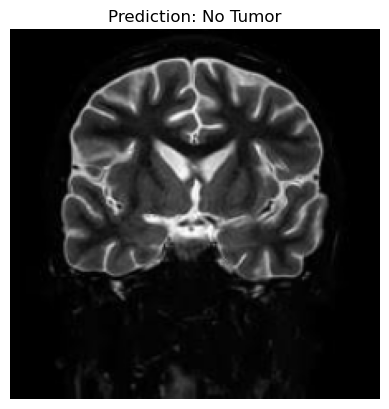

In [12]:
import random
import cv2

class_names = ["No Tumor", "Tumor"]

for i in range(5):
    img_path, label = random.choice(val_data.filepaths), None
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))
    img_norm = img / 255.0
    img_norm = img_norm.reshape(1,224,224,3)

    pred = model.predict(img_norm)[0][0]
    predicted_label = class_names[int(pred > 0.5)]

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predicted_label}")
    plt.axis("off")
    plt.show()


In [17]:
model.save("brain_tumor_model.keras")

